# Overview

nearest neighbor search in Python.

To figure out the closest shopping center from a particular home and work locations.

```
├── GEOG485
│   ├── Code
│   │   ├── this notebook
│   ├── Data
│   │   ├── shopping_centers.shp
│   │   ├── nyc_shapefiles
│   │   │   ├── nyc_subway_stations.shp
│   │   │   ├── nyc_census_blocks.shp

```

Let's start by connecting to google drive and locating to our designated folder and install necessary libraries:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/GEOG485/Code/') # change this to your folder

In [ ]:
!apt install libspatialindex-dev
!pip install osmnx
!pip install -U mapclassify
!pip install rtree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libspatialindex-dev is already the newest version (1.8.5-5).
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight

## Problem 1: What is the closest shopping center from a particular home / work?

**Steps**:

 - Create a txt-file called `activity_locations.txt`  with two columns:
    - `id`: unique id for each row
    - `addr`:  address of a particular home (e.g., Avalon Bowery Place) and work (e.g., New York University- College of Arts and Sciences)
    
Save the text file into the data folder.
    
 - Read those addresses using pandas and geocode the addresses.
 - Find out the nearest shopping center to these points using Shapely `nearest_points`.
 - Print out the name of the shopping center that is nearest to a) home and b) work. For example: `Shopping center closest to home: Manhattan Mall`.

In [ ]:
# Import modules
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from geopandas.tools import geocode

In [ ]:
# read in input files
fp = "../Data/activity_locations.txt"
data = pd.read_csv(fp, sep=';')
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

In [ ]:
#print the data to check
data

,id,addr
0,1,"11 E 1st, New York, NY 10003"
1,2,"32 Waverly Pl, New York, NY 10003"


In [ ]:
# Geocode activity locations
# Geocode the addresses using Nominatim
geo = geocode(data['addr'], provider='nominatim', user_agent='autogis_xx', timeout=4)

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

In [ ]:
# Check coordinate reference system information (re-project/define if needed)
geo.crs
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# shopping centres location
# read in input files
fp1 = "../Data/shopping_centers.shp"
dest = gpd.read_file(fp1)

In [ ]:
#check crs
dest.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
# reproject to same projection as data
dest = dest.to_crs('epsg:4326')

In [ ]:
geo.head()

,geometry,address
0,POINT (-72.47275 40.99412),"1st, New Suffolk, Town of Southold, Suffolk Co..."
1,POINT (-73.99541 40.73054),"32, Waverly Place, Washington Square Village, ..."


In [ ]:
type(geo)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#save as a shape file
# Output file path
outfp = "../Data/activity_locations.shp"

# Save to Shapefile
geo.to_file(outfp)

In [ ]:
dest.head()

,address,id,name,addr,geometry
0,The Rink at Brookfield Place with Gregory & Pe...,1,Brookfield Place,"230 Vesey St, New York, NY 10281",POINT (-74.01562 40.71232)
1,"Apple World Trade Center, 185, Greenwich Stree...",2,Westfield World Trade Center,"185 Greenwich St, New York, NY 10007",POINT (-74.01165 40.71177)
2,"Per Se, 10, Columbus Circle, Manhattan, New Yo...",3,The Shops at Columbus Circle,"10 Columbus Cir, New York, NY 10019",POINT (-73.98285 40.76825)
3,"30 Hudson Yards, 30, 10th Avenue, Hudson Yards...",4,Hudson Yards,"30 Hudson Yards, New York, NY 10001",POINT (-74.00054 40.75391)
4,"West 33rd Street, Herald Square, Manhattan, Ne...",5,Manhattan Mall,"00 W 33rd St, New York, NY 10001",POINT (-73.99050 40.75009)


In [ ]:
fp3 = "../Data/activity_locations.shp"
activity_locations = gpd.read_file(fp3)


In [ ]:
activity_locations.head()

,address,geometry
0,"1st, New Suffolk, Town of Southold, Suffolk Co...",POINT (-72.47275 40.99412)
1,"32, Waverly Place, Washington Square Village, ...",POINT (-73.99541 40.73054)


In [ ]:
# Find the closest shopping center for each activity location (closest shopping center from
# and closest shopping center from work) and print out the results:
from shapely.ops import nearest_points

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

In [ ]:
activity_locations['centroid'] = activity_locations.centroid
print(activity_locations.head())

                                             address  ...                    centroid
0  1st, New Suffolk, Town of Southold, Suffolk Co...  ...  POINT (-72.47275 40.99412)
1  32, Waverly Place, Washington Square Village, ...  ...  POINT (-73.99541 40.73054)

[2 rows x 3 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [ ]:
#closest shopping mall to first location
selected_neighbor1 = activity_locations.loc[0, 'centroid']
print(selected_neighbor1)

POINT (-72.4727524 40.9941238)


In [ ]:
#similarly
selected_neighbor2= activity_locations.loc[0, 'centroid']
print(selected_neighbor2)

POINT (-72.4727524 40.9941238)


In [ ]:
#unary union to shopping mall shape file
unary_union = dest.unary_union
print(unary_union)

MULTIPOINT (-74.0156188 40.71231739999999, -74.01165090000001 40.7117673, -74.00053573096068 40.75391085, -73.99223480000001 40.7257113, -73.99106069241896 40.74360450000001, -73.9904992 40.75008679999999, -73.9828519 40.7682549)


In [ ]:
# Find the nearest points
nearest_shopping_mall= nearest_points(selected_neighbor1, unary_union)
print(nearest_shopping_mall)


(<shapely.geometry.point.Point object at 0x7f0e8028cdd0>, <shapely.geometry.point.Point object at 0x7f0e8028c590>)


In [ ]:
nearest_shopping_mall[1].wkt

'POINT (-73.9828519 40.7682549)'

In [ ]:
# can also define a method for it
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    """Find the nearest point and return the corresponding value from specified value column."""
    
    # Create an union of the other GeoDataFrame's geometries:
    other_points = other_gdf["geometry"].unary_union
    
    # Find the nearest points
    nearest_geoms = nearest_points(row[point_column], other_points)
    
    # Get corresponding values from the other df
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]
    
    nearest_value = nearest_data[value_column].values[0]
    
    return nearest_value

In [ ]:
activity_locations["nearest_loc"] = activity_locations.apply(get_nearest_values, other_gdf=dest, point_column="centroid", axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/dtypes/cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
activity_locations.head()

,address,geometry,centroid,nearest_loc
0,"1st, New Suffolk, Town of Southold, Suffolk Co...",POINT (-72.47275 40.99412),POINT (-72.47275 40.99412),POINT (-73.9828519 40.7682549)
1,"32, Waverly Place, Washington Square Village, ...",POINT (-73.99541 40.73054),POINT (-73.99541 40.73054),POINT (-73.99223480000001 40.7257113)


In [ ]:
# Plot to verify they are the closest shopping center
activity_locations.plot()
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
raise NotImplementedError()

In [ ]:
import matplotlib.pyplot as plt

# Create a figure with one subplot
fig, ax = plt.subplots(figsize=(10,10))

# Plot polygons
# activity_locations.plot(ax=ax, facecolor='gray')
activity_locations.plot(ax=ax, facecolor='red')

# Plot points within Manhattan
dest.plot(ax=ax, color='gold', markersize=5)

# automatically organize plot features
# plt.tight_layout()

plt.tight_layout()

# drop pff locations outside manhattan are not showed anymore

Can you think of other application cases for the nearest neighbor analysis?

Spatial analyis to understand the closest buildings to a disaster site can be an exaple

## Problem 2: Which apartment buildings in Manhattan are suitable based on the two criteria below?

* good public transport accessibility
* bit further away from shopping malls

Steps:
1. Download apartment buildings in NYC using OSMnx (only apartments, not other types of buildings)
2. Read the subway station dataset and the shopping center dataset into Geopandas
3. Make sure three datasets are in the same projected coordinate system
4. Find closest subway station for each building and get also the distance based on euclidean distance 
5. Find closest shopping center for each building and get also the distance based on euclidean distance 
6. Merge the dataset so that each building has two important columns: 1)distance to closest subway station, 2) distance to closest shopping center and save the merged dataset into a shp. *(tips: before mergeing datasets, remove unuseful columns from datasets, and rename columns so that there are no overlapping column names before merging)*
7. Find out buidlings where the **distance to a subway station is smaller or equal to 100m** but they are further away **than 6 km (6000 meters) from shopping center**
8. Report how many apartments are selected, and plot their locations.




In [ ]:
# Step 1: Download apartment buildings in NYC using OSMnx (only apartments, not other types of buildings)
import osmnx as ox

# Specify the name that is used to seach for the data
place_name = "Manhattan, New York, USA"

# Retrieve the footprint of our location
area = ox.geocode_to_gdf(place_name)

# Retrieve buildings from the area
buildings = ox.geometries_from_place(place_name, tags={'building':True}) # since we only wanted apartments in our dataset

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/usr/local/lib/python3.7/dist-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


In [ ]:
print(type(area))
print(type(buildings))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
buildings.head()

building  ele  ... ways alt_name:fr
element_type osmid                       ...                 
node         158877293  apartments    8  ...  NaN         NaN
             344806733         yes  NaN  ...  NaN         NaN
             357616326         yes   38  ...  NaN         NaN
             357620961         yes    9  ...  NaN         NaN
             368042699         yes    9  ...  NaN         NaN

[5 rows x 460 columns]

In [ ]:
# Select only the apartments: name that new geodataframe as 'apartments'

apartments = buildings.loc[buildings['building']=='apartments']
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

In [ ]:
# Convert all polygon into points as well using their centroids
apartments['geometry'] = apartments['geometry'].centroid

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

# Select useful columns
apartments = apartments[['name','geometry']]
apartments.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  
/usr/local/lib/python3.7/dist-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


name                    geometry
element_type osmid                                                  
node         158877293   Hamilton Houses  POINT (-73.94270 40.82111)
             2768450184   The Poinsettia  POINT (-73.95894 40.80904)
             3580782407              NaN  POINT (-73.97623 40.78337)
             8651474151   1 Central Park  POINT (-73.98332 40.76822)
             8711082537              NaN  POINT (-73.98094 40.74804)

In [ ]:
area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
area.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
import geopandas as gpd
nyc_subway_stations = gpd.read_file('/content/drive/MyDrive/GEOG485/Data/nyc_shapefiles/nyc_subway_stations.shp')

In [ ]:
nyc_subway_stations.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
area = area.to_crs('epsg:26918')

In [ ]:
# Step 2: Read the subway station dataset and the shopping center dataset into Geopandas


# select only the ones in Manhattan
manhattan_subway_stations = gpd.sjoin(nyc_subway_stations, area, how="inner", predicate="within")

# Read in shopping center shp
shopping_centers = gpd.read_file('/content/drive/MyDrive/GEOG485/Data/shopping_centers.shp')

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()


In [ ]:
!pip install matplotlib==3.1.2


  Using cached matplotlib-3.1.2-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.5 which is incompatible.
osmnx 1.1.2 requires matplotlib>=3.4, but you have matplotlib 3.1.2 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


/usr/local/lib/python3.7/dist-packages/google/colab/_pip.py:87: ResourceWarning: unclosed file <_io.TextIOWrapper name='/usr/local/lib/python3.7/dist-packages/matplotlib-3.1.2.dist-info/top_level.txt' mode='r' encoding='UTF-8'>
  for line in open(toplevel):


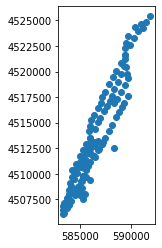

In [ ]:
manhattan_subway_stations.plot()

In [ ]:
# Step 3: Make sure three datasets are in the same projected coordinate system
print(apartments.crs)
print(manhattan_subway_stations.crs)
print(shopping_centers.crs)
print(buildings.crs)

epsg:4326
epsg:26918
epsg:26918
epsg:4326


In [ ]:
# Convert crs as needed
apartments = apartments.to_crs('epsg:26918')
buildings = buildings.to_crs('epsg:26918')
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

In [ ]:
buildings.crs

<Projected CRS: EPSG:26918>
Name: NAD83 / UTM zone 18N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 78°W and 72°W - onshore and offshore. Canada - Nunavut; Ontario; Quebec. United States (USA) - Connecticut; Delaware; Maryland; Massachusetts; New Hampshire; New Jersey; New York; North Carolina; Pennsylvania; Virginia; Vermont.
- bounds: (-78.0, 28.28, -72.0, 84.0)
Coordinate Operation:
- name: UTM zone 18N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [ ]:
#check
print(apartments.crs)
print(manhattan_subway_stations.crs)
print(shopping_centers.crs)

epsg:26918
epsg:26918
epsg:26918


In [ ]:
apartments['geometry'] = apartments['geometry'].centroid

In [ ]:
# Select useful columns
apartments = apartments[['name','geometry']]

In [ ]:
apartments

name                        geometry
element_type osmid                                                              
node         158877293           Hamilton Houses  POINT (589160.971 4519436.810)
             2768450184           The Poinsettia  POINT (587808.005 4518080.637)
             3580782407                      NaN  POINT (586382.760 4515213.912)
             8651474151           1 Central Park  POINT (585803.501 4513525.391)
             8711082537                      NaN  POINT (586031.042 4511286.721)
...                                          ...                             ...
relation     3661251                         NaN  POINT (589684.165 4523480.426)
             3661280                         NaN  POINT (590508.047 4523932.629)
             7516488                 Gotham West  POINT (584698.429 4512838.008)
             13497142    160 Riverside Boulevard  POINT (585368.112 4514568.542)
             13497143    180 Riverside Boulevard  POINT (585392.493 4514648.644)

[5657 rows x 2 columns]

In [ ]:
from sklearn.neighbors import BallTree
import numpy as np

def get_nearest(src_points, candidates, k_neighbors=1):
    """Find nearest neighbors for all source points from a set of candidate points"""

    # Create tree from the candidate points
    tree = BallTree(candidates, leaf_size=15, metric='euclidean')

    # Find closest points and distances
    distances, indices = tree.query(src_points, k=k_neighbors)

    # Transpose to get distances and indices into arrays
    distances = distances.transpose()
    indices = indices.transpose()

    # Get closest indices and distances (i.e. array at index 0)
    # note: for the second closest points, you would take index 1, etc.
    closest = indices[0]
    closest_dist = distances[0]

    # Return indices and distances
    return (closest, closest_dist)
    
def nearest_neighbor(left_gdf, right_gdf, return_dist=False):
    """
    For each point in left_gdf, find closest point in right GeoDataFrame and return them.
    
    NOTICE: Assumes that the input Points are in UTM projection (meters).
    """
    
    left_geom_col = left_gdf.geometry.name
    right_geom_col = right_gdf.geometry.name
    
    # Ensure that index in right gdf is formed of sequential numbers
    right = right_gdf.copy().reset_index(drop=True)
    
    # Parse coordinates from points and insert them into a numpy array 
    # Notice: should be in meters 
    left_geom = np.array(left_gdf[left_geom_col].apply(lambda geom: (geom.y, geom.x)).to_list())
    right_geom = np.array(right[right_geom_col].apply(lambda geom: (geom.y, geom.x)).to_list())
    
    # Find the nearest points
    # -----------------------
    # closest ==> index in right_gdf that corresponds to the closest point
    # dist ==> distance between the nearest neighbors (in meters)
    print(right_geom.shape)
    closest, dist = get_nearest(src_points=left_geom, candidates=right_geom)

    # Return points from right GeoDataFrame that are closest to points in left GeoDataFrame
    closest_points = right.loc[closest]
    
    # Ensure that the index corresponds the one in left_gdf
    closest_points = closest_points.reset_index(drop=True)
    
    # Add distance if requested 
    if return_dist:
        closest_points['distance'] = dist
        
    return closest_points

In [ ]:
# Step 4: Find closest subway station for each building and get also the distance based on euclidean distance (using nearest_neighbor function again)
closest_subway_stations = nearest_neighbor(apartments, manhattan_subway_stations, return_dist=True)




(140, 2)


In [ ]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

# Rename the distance to closest subway station so that we can easily identify it
closest_subway_stations = closest_subway_stations.rename(columns={'distance': 'dist2subway'})
closest_subway_stations = closest_subway_stations.rename(columns={'geometry': 'closest_subway_geom'})

# select useful columns
closest_subway_stations = closest_subway_stations[['ID','dist2subway','closest_subway_geom']]

# And the result looks like ..
closest_subway_stations.head()

,ID,dist2subway,closest_subway_geom
0,197.0,368.741482,POINT (588987.833 4519762.376)
1,24.0,435.499730,POINT (587389.738 4517959.341)
2,19.0,320.949908,POINT (586065.449 4515262.109)
3,187.0,120.643684,POINT (585922.594 4513506.111)
4,113.0,195.947648,POINT (585957.262 4511105.194)


In [ ]:
# Step 5: Find closest shopping center for each building and get also the distance based on euclidean distance 
closest_shopping_centers = nearest_neighbor(apartments, shopping_centers, return_dist=True)
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

# Rename the distance to closest shopping centers so that we can easily identify it
closest_shopping_centers = closest_shopping_centers.rename(columns={'distance': 'dist2shoppingcenters'})
closest_shopping_centers = closest_shopping_centers.rename(columns={'geometry': 'closest_shopping_center_geom'})

# select useful columns
closest_shopping_centers = closest_shopping_centers[['id','dist2shoppingcenters', 'closest_shopping_center_geom']]

# And the result looks like ..
closest_shopping_centers.head()

(7, 2)


,id,dist2shoppingcenters,closest_shopping_center_geom
0,3,6775.390226,POINT (585843.305 4513529.272)
1,3,4957.314699,POINT (585843.305 4513529.272)
2,3,1768.905086,POINT (585843.305 4513529.272)
3,3,39.993131,POINT (585843.305 4513529.272)
4,5,838.849918,POINT (585221.095 4511505.023)


In [ ]:
# Step 6: Merge the dataset so that each building has two important columns: 1)distance to closest subway station, 2) distance to closest shopping center

apartments['index'] = closest_shopping_centers.index
closest_shopping_centers['index'] = closest_shopping_centers.index

# Merge the datasets by index (for this, it is good to use '.merge()' -function)
apartments = apartments.merge(closest_shopping_centers, on='index')

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

# Let's see what we have
apartments.head()

,name,geometry,index,id,dist2shoppingcenters,closest_shopping_center_geom
0,Hamilton Houses,POINT (589160.971 4519436.810),0,3,6775.390226,POINT (585843.305 4513529.272)
1,The Poinsettia,POINT (587808.005 4518080.637),1,3,4957.314699,POINT (585843.305 4513529.272)
2,NaN,POINT (586382.760 4515213.912),2,3,1768.905086,POINT (585843.305 4513529.272)
3,1 Central Park,POINT (585803.501 4513525.391),3,3,39.993131,POINT (585843.305 4513529.272)
4,NaN,POINT (586031.042 4511286.721),4,5,838.849918,POINT (585221.095 4511505.023)


In [ ]:
closest_subway_stations['index'] = closest_subway_stations.index

# Merge the datasets by index (for this, it is good to use '.merge()' -function)
apartments = apartments.merge(closest_subway_stations, on='index')

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

# Let's see what we have
apartments.head()

,name,geometry,index,id,dist2shoppingcenters,closest_shopping_center_geom,ID,dist2subway,closest_subway_geom
0,Hamilton Houses,POINT (589160.971 4519436.810),0,3,6775.390226,POINT (585843.305 4513529.272),197.0,368.741482,POINT (588987.833 4519762.376)
1,The Poinsettia,POINT (587808.005 4518080.637),1,3,4957.314699,POINT (585843.305 4513529.272),24.0,435.499730,POINT (587389.738 4517959.341)
2,NaN,POINT (586382.760 4515213.912),2,3,1768.905086,POINT (585843.305 4513529.272),19.0,320.949908,POINT (586065.449 4515262.109)
3,1 Central Park,POINT (585803.501 4513525.391),3,3,39.993131,POINT (585843.305 4513529.272),187.0,120.643684,POINT (585922.594 4513506.111)
4,NaN,POINT (586031.042 4511286.721),4,5,838.849918,POINT (585221.095 4511505.023),113.0,195.947648,POINT (585957.262 4511105.194)


In [ ]:
# save the merged dataset into a shp， replace 'None' to a output file name
fp4 = "../Data/assignment2_mergeddata.shp" 
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

apartments[['name', 'geometry', 'dist2subway', 'dist2shoppingcenters']].to_file(fp4)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  


In [ ]:
def custom_classifier(row, src_col1, src_col2, threshold1, threshold2, output_col):
    """Custom classirifer that can be applied on each row of a pandas dataframe (axis=1).
    
    This function classifies data based on values in two source columns and stores the output value in the output column.
    Output values is 1 if the value in src_col1 is LOWER than the threshold1 value AND the value in src_col2 is HIGHER than the threshold2 value. 
    In all other cases, output value is 0.
    
    Args:
        row: one row of data
        src_col1: source column name associated with threshold1
        src_col2: source column name associated with threshold2
        threshold1: upper threshold value for src_col1
        threshold2: lower threshold value for src_col2
        output_col: output column name

    Returns:
        updated row of data.
    """

    # If condition is true, assign 1 into output column
    if row[src_col1] < threshold1 and row[src_col2] > threshold2:
        row[output_col] = 1
    
    # Else, assign 1 into output column
    else:
        row[output_col] = 0

    # Return the updated row
    return row

In [ ]:
# Step 7: Find out buidlings where the distance to a subway station is smaller or equal to 100m but they are further away than 6 km (6000 meters) from shopping center




apartments_selected = apartments.apply(custom_classifier, src_col1='dist2subway', threshold1=100, src_col2='dist2shoppingcenters', threshold2=6000,
                            axis=1)

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()

In [ ]:
apartments_selected.head()

,name,geometry,index,id,dist2shoppingcenters,closest_shopping_center_geom,ID,dist2subway,closest_subway_geom,selected
0,Hamilton Houses,POINT (589160.971 4519436.810),0,3,6775.390226,POINT (585843.3050298889 4513529.271564219),197.0,368.741482,POINT (588987.8328635037 4519762.375897892),0
1,The Poinsettia,POINT (587808.005 4518080.637),1,3,4957.314699,POINT (585843.3050298889 4513529.271564219),24.0,435.499730,POINT (587389.7377955408 4517959.341232643),0
2,NaN,POINT (586382.760 4515213.912),2,3,1768.905086,POINT (585843.3050298889 4513529.271564219),19.0,320.949908,POINT (586065.4491203394 4515262.109323109),0
3,1 Central Park,POINT (585803.501 4513525.391),3,3,39.993131,POINT (585843.3050298889 4513529.271564219),187.0,120.643684,POINT (585922.593924491 4513506.111485398),0
4,NaN,POINT (586031.042 4511286.721),4,5,838.849918,POINT (585221.094900274 4511505.023191012),113.0,195.947648,POINT (585957.2623876379 4511105.1943025),0


In [ ]:
# Step 8: Report how many apartments are selected, and plot their locations.
len(apartments_selected)
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
# raise NotImplementedError()?

5657